# Pristine GRAPE calculation of control fields for cnot implementation

Robert Johansson (robert@riken.jp)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from qutip import *
from qutip.control import *

In [3]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

In [4]:
T

6.283185307179586

"""
    Class for representing the result of a GRAPE simulation.

    Attributes
    ----------
    u : array
        GRAPE control pulse matrix.

    H_t : time-dependent Hamiltonian
        The time-dependent Hamiltonian that realize the GRAPE pulse sequence.

    U_f : Qobj
        The final unitary transformation that is realized by the evolution
        of the system with the GRAPE generated pulse sequences.
    
    """

In [5]:
U = sigmax()
R = 500
H_ops = [sigmay()]
H_labels = [r'$u_{y}$']

$U = \sigma_{x} $   
$H_{ops} = [\sigma_{y} ] $


In [6]:
omega_1 = 0.5
H0 =  omega_1 * sigmaz()

c_ops = []

# GRAPE

In [7]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [8]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [9]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [10]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=True,
                          progress_bar=TextProgressBar())

10.0%. Run time:  40.69s. Est. time left: 00:00:06:06
20.0%. Run time:  81.51s. Est. time left: 00:00:05:26
30.0%. Run time: 121.88s. Est. time left: 00:00:04:44
40.0%. Run time: 162.64s. Est. time left: 00:00:04:03
50.0%. Run time: 203.13s. Est. time left: 00:00:03:23
60.0%. Run time: 243.80s. Est. time left: 00:00:02:42
70.0%. Run time: 284.56s. Est. time left: 00:00:02:01
80.0%. Run time: 325.58s. Est. time left: 00:00:01:21
90.0%. Run time: 366.03s. Est. time left: 00:00:00:40
Total run time: 405.82s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

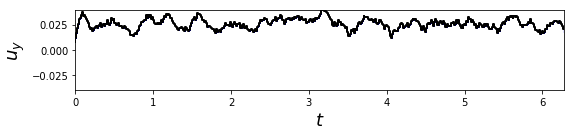

In [11]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [12]:
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [13]:
result.U_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.98676906+0.15977001j  0.02720972+0.00447186j]
 [-0.02720972+0.00447186j -0.98676906-0.15977001j]]

In [14]:
result.U_f/1j

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.15977001+0.98676906j  0.00447186-0.02720972j]
 [ 0.00447186+0.02720972j -0.15977001+0.98676906j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2127a0b8>)

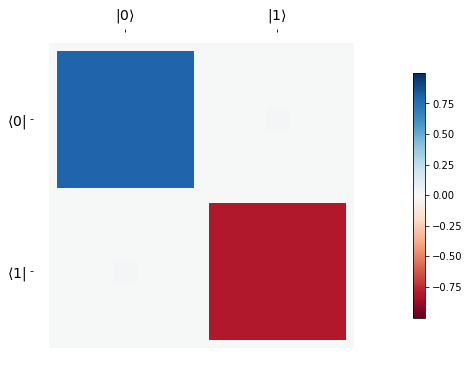

In [15]:
hinton(result.U_f/1j)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2130e4a8>)

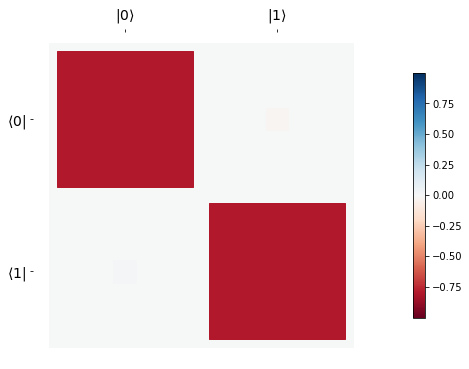

In [16]:
hinton(result.U_f)

In [17]:
result.H_t[0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.5  0. ]
 [ 0.  -0.5]]

In [18]:
result.H_t[1]

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[0.+0.j 0.-1.j]
  [0.+1.j 0.+0.j]],
 array([0.0490166 , 0.07407331, 0.10295165, 0.13377211, 0.16212405,
        0.18876499, 0.19707723, 0.21929866, 0.23336211, 0.21313667,
        0.2173401 , 0.20277326, 0.18916689, 0.17681495, 0.16477132,
        0.14111555, 0.13007859, 0.13462039, 0.11846277, 0.12425952,
        0.13606705, 0.13909066, 0.14768612, 0.13803872, 0.14884598,
        0.1566339 , 0.16499759, 0.13877329, 0.15622705, 0.16308009,
        0.14727327, 0.16071544, 0.1627953 , 0.18412784, 0.15858426,
        0.15397307, 0.16870518, 0.19555837, 0.18522066, 0.18248431,
        0.1938177 , 0.16841547, 0.16818617, 0.15386083, 0.16012831,
        0.16960594, 0.14864352, 0.14968464, 0.14841248, 0.13725437,
        0.13574534, 0.1492244 , 0.13917754, 0.13104315, 0.13076466,
        0.12208635, 0.11908079, 0.09042814, 0.09158315, 0.09405663,
        0.08822078, 0.09678564, 0.10455382, 0.10049279

In [19]:
result.u

array([[[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.11273802]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       ...,

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]]])

## Test numerical integration of GRAPE pulse

In [20]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.99847804+0.02450957j  0.00277707-0.04932724j]
 [-0.00277707-0.04932724j -0.99847804-0.02450957j]]

In [21]:
U_f_numerical / U_f_numerical[0,0]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j         -0.00399157+0.04930445j]
 [ 0.00156768+0.04944091j  0.99879562+0.04906429j]]

In [22]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

(0.9890381067559504, 0.9781963766153947)

# Imports

Need to have jate.py in your folder

In [23]:
%run jate.py #will import everything

<Figure size 432x288 with 0 Axes>

## My code 

## Building parts

### Building the things to be calculated only once

In [24]:
def maker(omega_1, H_0, H_1, T_s, Lin, d=2, gamma=0.1):
    r"""maker
    Makes all the things that remain constant throught the program, but are 
    repeatedly used.
    

    Parameters
    ----------
    omega_1 : float
              frequency corresponding to half of the difference between 
              energy levels of the qubit
              
    H_0     : Qobj
              Bare Hamiltonian 
              
    H_1     : Qobj
              Interaction Hamiltonian 
              
    T_s     : Qobj
              Unitary to be implemented in the Hilbert space
    
    Lin     : Qobj
              Linbladian operators

    d       : int
              Dimension of the matrix. Defaults to 2
    
    gamma   : float
              Damping constantof the Linbladian

    
    Returns
    -------
    
    ih0     : Qobj
              $I\otimes H_{0}$
              
    ih1     : Qobj
              $I\otimes H_{1}$

    h0ci    : Qobj
              $H_{0}^{*}\otimes I $

    h1ci    : Qobj
              $H_{1}^{*}\otimes I $

    T       : Qobj
              Target unitary transformed to the Liouville space

    linbladian : Qobj
                 The full lindbladian term as it appears on transformation to 
                 the Liouville space.
        
    """
    I = identity(d)
    L_I = tensor(I, I)
    ih0 = tensor(I, H_0) 
    ih1 = tensor(I, H_1) 
    h0ci = tensor(H_0.conj(), I) 
    h1ci = tensor(H_1.conj(), I)
    x_k = ih1 - h1ci
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    lindbladian = 1j*(gamma)*(term1 - 0.5*(term2 + term3))
    T = tensor(T_s.trans(), T_s) # Transforming $T_{s}$ to liouville space
    
    
    return ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I

In [25]:
omega_1 = 0.5
H_0 = omega_1*sigmaz() 
H_1 = sigmay()
T_s = sigmax() 
Lin = sigmaz()
ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I  = maker(omega_1,
                                                  H_0, H_1, T_s, 
                                                  Lin, d=2, gamma=0.0)

In [26]:
L_I

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Building $A(t)$

In [27]:
def A(xi):
    r"""making $A(t)$"""
    A = ih0 - h0ci + xi*(ih1 - h1ci) + lindbladian
    return A

In [28]:
A(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.+0.j   0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.+0.j   0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $L(t)$ and the Identity in the Liouville space

In [29]:
def L(xi, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(xi)*dt).expm()
    return L

In [30]:
L(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99999833e-04-2.49999958e-07j
  -4.99999833e-04+2.49999958e-07j  2.49999958e-07+0.00000000e+00j]
 [ 4.99999833e-04+2.49999958e-07j  9.99999250e-01+9.99999667e-04j
  -2.49999958e-07+0.00000000e+00j -4.99999833e-04-2.49999958e-07j]
 [ 4.99999833e-04-2.49999958e-07j -2.49999958e-07+0.00000000e+00j
   9.99999250e-01-9.99999667e-04j -4.99999833e-04+2.49999958e-07j]
 [ 2.49999958e-07+0.00000000e+00j  4.99999833e-04+2.49999958e-07j
   4.99999833e-04-2.49999958e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [31]:
# building the function to optimize (optimizee)
def L_vec(xi_vec, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(xi, dt) for xi in xi_vec] 
    return L_vec

In [32]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [33]:
def L_full_maker(xi_vec, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I # Identity for the for loop of L
    L_v = L_vec(xi_vec, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [34]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, L_full))   
    return F

### Testing major functions 1

In [35]:
fidelity_calc(sigmax(), sigmay())

4.0

In [36]:
fidelity_calc(sigmay(), sigmay())

0.0

In [37]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [38]:
xi_vec_test.size

2

In [39]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [40]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.999999999998001

In [41]:
L_v = L_vec(xi_vec_test, 0.001)

In [42]:
L_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99999167e-04-4.99999792e-07j
   -9.99999167e-04+4.99999792e-07j  9.99999583e-07+0.00000000e+00j]
  [ 9.99999167e-04+4.99999792e-07j  9.99998500e-01+9.99999167e-04j
   -9.99999583e-07+0.00000000e+00j -9.99999167e-04-4.99999792e-07j]
  [ 9.99999167e-04-4.99999792e-07j -9.99999583e-07+0.00000000e+00j
    9.99998500e-01-9.99999167e-04j -9.99999167e-04+4.99999792e-07j]
  [ 9.99999583e-07+0.00000000e+00j  9.99999167e-04+4.99999792e-07j
    9.99999167e-04-4.99999792e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99999433e-03-9.99998583e-07j
   -1.99999433e-03+9.99998583e-07j  3.99999433e-06+0.00000000e+00j]
  [ 1.99999433e-03+9.99998583e-07j  9.99995500e-01+9.99997167e-04j
   -3.99999433e-06+0.00000000e+00j -1.99999433e-03-9.99998

### Major Functions 2

In [43]:
def L_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(xi_vec, dt)# Making of the full $L(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [44]:
# L_comma_k_maker(xi_vec, k, dt)
L_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991000e-01+0.00000000e+00j -2.99997950e-03-3.49998654e-06j
  -2.99997950e-03+3.49998654e-06j  8.99997025e-06+0.00000000e+00j]
 [ 2.99998050e-03+2.49999246e-06j  9.99989000e-01+1.99998633e-03j
  -8.99996975e-06+2.99999225e-09j -2.99998050e-03-2.49999246e-06j]
 [ 2.99998050e-03-2.49999246e-06j -8.99996975e-06-2.99999225e-09j
   9.99989000e-01-1.99998633e-03j -2.99998050e-03+2.49999246e-06j]
 [ 8.99997025e-06+0.00000000e+00j  2.99997950e-03+3.49998654e-06j
   2.99997950e-03-3.49998654e-06j  9.99991000e-01+0.00000000e+00j]]

In [45]:
def updater(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(xi_vec, k, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [46]:
#  updater(xi_vec, dt, epsilon)
updater(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [47]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# Running stuff

### qutip grape

In [48]:
xi_qutip = result.u

In [49]:
len(xi_qutip)

500

In [50]:
xi_qutip.shape

(500, 1, 500)

In [51]:
xi_qutip.size

250000

In [52]:
len(xi_qutip[0])

1

In [53]:
len(xi_qutip[1])

1

In [54]:
len(xi_qutip[2])

1

In [55]:
len(xi_qutip[0][0])

500

In [56]:
len(xi_qutip[1][0])

500

In [57]:
len(xi_qutip[1][0])

500

In [58]:
len(xi_qutip[250][0])

500

In [59]:
len(xi_qutip[250,0,:])

500

In [60]:
len(xi_qutip[250,1,:])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [61]:
len(xi_qutip[-1,0,:])

500

In [62]:
xi_qutip[0][0][1]

0.07407330669029837

In [63]:
xi_qutip

array([[[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.11273802]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       ...,

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]],

       [[0.0490166 , 0.07407331, 0.10295165, ..., 0.14604496,
         0.13199433, 0.13199433]]])

In [64]:
xi_qutip[-1,0, :]

array([0.0490166 , 0.07407331, 0.10295165, 0.13377211, 0.16212405,
       0.18876499, 0.19707723, 0.21929866, 0.23336211, 0.21313667,
       0.2173401 , 0.20277326, 0.18916689, 0.17681495, 0.16477132,
       0.14111555, 0.13007859, 0.13462039, 0.11846277, 0.12425952,
       0.13606705, 0.13909066, 0.14768612, 0.13803872, 0.14884598,
       0.1566339 , 0.16499759, 0.13877329, 0.15622705, 0.16308009,
       0.14727327, 0.16071544, 0.1627953 , 0.18412784, 0.15858426,
       0.15397307, 0.16870518, 0.19555837, 0.18522066, 0.18248431,
       0.1938177 , 0.16841547, 0.16818617, 0.15386083, 0.16012831,
       0.16960594, 0.14864352, 0.14968464, 0.14841248, 0.13725437,
       0.13574534, 0.1492244 , 0.13917754, 0.13104315, 0.13076466,
       0.12208635, 0.11908079, 0.09042814, 0.09158315, 0.09405663,
       0.08822078, 0.09678564, 0.10455382, 0.10049279, 0.11801597,
       0.12248866, 0.14694199, 0.15343512, 0.17019215, 0.17259179,
       0.1804393 , 0.18710611, 0.18794328, 0.21567839, 0.19847

In [65]:
#L_full_maker(xi_qutip, dt)
L_full_maker(xi_qutip[-1, 0, :], dt)

NameError: name 'dt' is not defined

In [69]:
2 * np.pi/500

0.012566370614359173

In [70]:
#L_full_maker(xi_qutip, dt)
blah = L_full_maker(xi_qutip[-1, 0, :], (2 * np.pi/500))
blah

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99253868e-01+0.00000000e+00j -2.58499650e-02-8.79514822e-03j
  -2.58499650e-02+8.79514822e-03j  7.46132034e-04+0.00000000e+00j]
 [ 2.73045606e-02-1.90499286e-04j  9.48220118e-01+3.15256881e-01j
  -7.04672244e-04+2.45255050e-04j -2.73045606e-02+1.90499286e-04j]
 [ 2.73045606e-02+1.90499286e-04j -7.04672244e-04-2.45255050e-04j
   9.48220118e-01-3.15256881e-01j -2.73045606e-02-1.90499286e-04j]
 [ 7.46132034e-04+0.00000000e+00j  2.58499650e-02+8.79514822e-03j
   2.58499650e-02-8.79514822e-03j  9.99253868e-01+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a240ba9b0>)

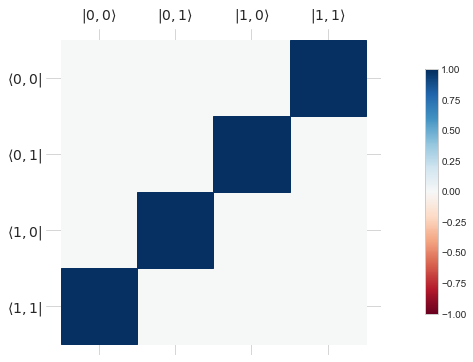

In [71]:
hinton(T)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a24320438>)

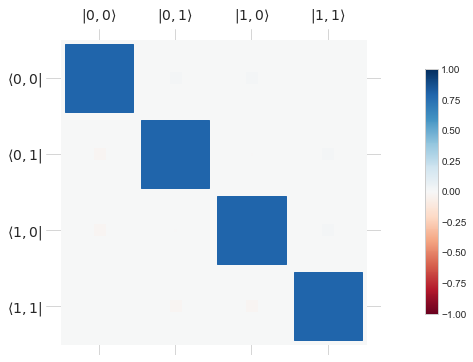

In [72]:
hinton(blah/blah[0,0])

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a24033f28>)

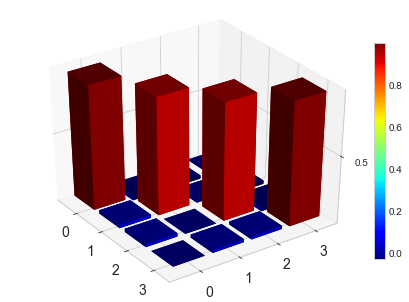

In [73]:
matrix_histogram(blah)

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1a245caeb8>)

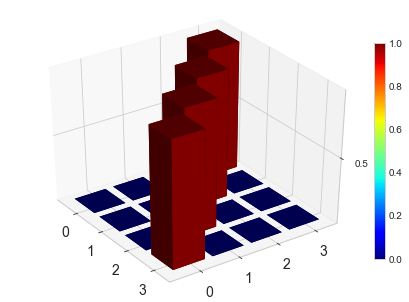

In [74]:
matrix_histogram(T)

In [75]:
T_s

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [76]:
F(xi_qutip[-1, 0, :], dt)

NameError: name 'dt' is not defined

In [77]:
F(xi_qutip[-1, 0, :], (2*np.pi/500))

-7.9998341608429975

### Try1

In [ ]:
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [ ]:
hinton(T)

In [ ]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

In [ ]:
F(xi_opt, dt)

In [ ]:
max_iter

In [ ]:
T

In [ ]:
L_full_maker(xi_opt, dt)

In [ ]:
hinton(L_full_maker(xi_opt, dt))